## CO 2:Data Preprocessing


**Example problems**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read dataset into a dataframe
data=pd.read_csv(r"C:\Users\Shabbeer Basha\Desktop\IML_Course\CO2 Apply data preprocessing on input data\Class Activity/Placement_Data.csv")
data.head(4)

,sl_no,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,M,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0
1,2,M,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0
2,3,M,NaN,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0
3,4,M,52.00,Science,NaN,Sci&Tech,66.0,Mkt&HR,59.43,NaN


In [3]:
data.shape

(215, 10)

# Handling missing values

Calculate the number of missing values in each column

In [4]:
data.isnull().sum()

sl_no              0
gender             0
hsc_p              5
hsc_s              0
degree_p           2
degree_t           0
etest_p            4
specialisation     0
mba_p              1
salary            67
dtype: int64

Replace missing values in features (columns) that have less than 20 percent null values with appropriate measures.

In [10]:
hsc_p_mean = data['hsc_p'].mean()
etest_p_mean = data['etest_p'].mean()
degree_p_mean= data['degree_p'].mean()
mba_p_mean = data['mba_p'].mean()


data['hsc_p'].fillna(hsc_p_mean, inplace=True)
data['etest_p'].fillna(etest_p_mean, inplace=True)
data['degree_p'].fillna(degree_p_mean, inplace=True)
data['mba_p'].fillna(mba_p_mean, inplace=True)


Remove all the rows where the salary column has null values since this column has more than 20% null values (67)

In [11]:
data.dropna(subset=['salary'], inplace=True)

In [12]:
data.isna().sum()

sl_no             0
gender            0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [13]:
data.shape

(148, 10)

#Detecting Outliers:
1.Visualization (Box Plot):

Check for outliers using boxplot.

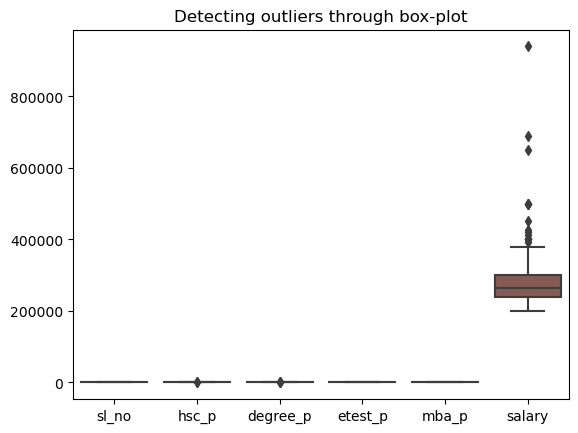

In [23]:
sns.boxplot(data)
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(5, 5))
# sns.boxplot(data)
plt.title('Detecting outliers through box-plot')
# plt.xticks(rotation=90)
plt.show()

2. Using Z-Scores

Cheak for outliers using Z-scores method.

In [16]:
#another library to compute z_score which can be used to detect outliers

from scipy import stats


# Specify columns to check for outliers
columns_to_check = ['salary']
# Calculate Z-scores for each column
z_scores = stats.zscore(data[columns_to_check])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
outlier_indices = (z_scores > threshold).any(axis=1)
outliers_df = data[outlier_indices]

print("Rows with Outliers:")
print(outliers_df['salary'])


Rows with Outliers:
119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64


# Handling outliers

1. Remove Outliers:

Remove outliers using the following three methods.

In [ ]:
#delete the outliers

2.Quantile-Based Capping and Flooring:

In [ ]:
# Cap and floor values using quantiles



3. Mean/Median Imputation:

In [ ]:
#df_imputed = data.copy()

#for column in columns_to_check:
    #median_value = df_imputed[column].median()
    #df_imputed[column] = df_imputed[column].apply(lambda x: median_value if x > upper_limit[column] or x < lower_limit[column] else x)


# Feature Encoding

1.Label encoding

Apply label encoding to all categorical variables.

In [17]:
data.dtypes

sl_no               int64
gender             object
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [19]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [18]:
data['gender'].unique()
data['hsc_s'].unique()
data['degree_t'].unique()
data['specialisation'].unique()
#Note that just the last statement output is getting printed here.

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
## Apply label encoding for columns gender, hsc_s, degree_t, specialisation

In [ ]:
#See the changes reflected after label encoding
data.head()

,sl_no,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,0,91.000,0,58.00,1,55.0,0,58.80,270000.0
1,2,0,78.330,1,77.48,1,86.5,1,66.28,200000.0
2,3,0,66.503,2,64.00,0,75.0,1,57.80,250000.0
4,5,0,73.600,0,73.30,0,96.8,1,55.50,425000.0
7,8,0,64.000,1,66.00,1,67.0,1,62.14,252000.0



Conduct one-hot encoding by separating features from target variables.

In [20]:
##Understand this cell, no need to code.
# Seperating Features and Target

X = data[['gender', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t','etest_p', 'specialisation', 'mba_p',]]
y = data['salary']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

C:\Users\Shabbeer Basha\AppData\Local\Temp\ipykernel_33352\2756527630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
C:\Users\Shabbeer Basha\AppData\Local\Temp\ipykernel_33352\2756527630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
C:\Users\Shabbeer Basha\AppData\Local\Temp\ipykernel_33352\2756527630.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [21]:
#Perform one-hot encoding using pandas for dataframe X



In [ ]:
##Print X
X

,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,91.000,58.00,55.0,58.80,0,1,0,1,0,0,0,1,0,1
1,78.330,77.48,86.5,66.28,0,1,0,0,1,0,0,1,1,0
2,66.503,64.00,75.0,57.80,0,1,1,0,0,1,0,0,1,0
4,73.600,73.30,96.8,55.50,0,1,0,1,0,1,0,0,1,0
7,64.000,66.00,67.0,62.14,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,72.000,65.00,67.0,56.49,0,1,0,1,0,1,0,0,1,0
210,82.000,77.60,91.0,74.49,0,1,0,1,0,1,0,0,1,0
211,60.000,72.00,74.0,53.62,0,1,0,0,1,0,0,1,1,0
212,67.000,73.00,59.0,69.72,0,1,0,1,0,1,0,0,1,0


Perform feature scaling for numarical values.

MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#feature_range arguemnt can be used to specify the min, max range for features while creating the object for MinMaxScaler class. Eg. feature_range=(-1,1)
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.85705142, 0.05714286, 0.10416667, ..., 1.        , 0.        ,
        1.        ],
       [0.58672925, 0.61371429, 0.76041667, ..., 1.        , 1.        ,
        0.        ],
       [0.334393  , 0.22857143, 0.52083333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.19564754, 0.45714286, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.3449968 , 0.48571429, 0.1875    , ..., 0.        , 1.        ,
        0.        ],
       [0.32366119, 0.05714286, 0.41666667, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
columns = X.columns  # Assuming X is a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=columns)

In [ ]:
X_scaled_df

,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.857051,0.057143,0.104167,0.251666,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.586729,0.613714,0.760417,0.544884,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.334393,0.228571,0.520833,0.212466,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.485812,0.494286,0.975000,0.122305,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.280990,0.285714,0.354167,0.382595,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.451675,0.257143,0.354167,0.161113,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
144,0.665031,0.617143,0.854167,0.866719,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
145,0.195648,0.457143,0.500000,0.048608,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
146,0.344997,0.485714,0.187500,0.679733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Code for standardization

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#Y_scaled = scaler.fit_transform(X)

-------
-------

# **Exercise problems**

In [ ]:
import pandas as pd

1. Given Automobile.csv, read the csv file.

##Handling Null values

2. Calculate number of null values in each column

3. Delete or Fill the null values with appropriate measures

##Detecting Outliers:


4. Check for outliers using boxplot

##Handeling outliers

5. Remove outliers

# Feature Encoding

label encoding

8. Perform label encoding to all categorical variables.

##Scaling

10. Perform MinMax scaling for numarical features (not encoded categorical variables)